### generate # states lower than 23

In [1]:
from ModelLearning.genPOMDP import *
from os import system

diffs = [[0,1], #5 states
         [0, 0.33, 0.66, 1], #9 states
         [0, 0.2, 0.4, 0.6, 0.8, 1], # 13 states
         [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1] #17 states
        ]

wrong_answer_costs = [10,20,50,500,1000]

#filename, wronganswercost,createjobcost,distributionavg,numpools
for wrong_cost in wrong_answer_costs:
    for diff in diffs:
        num_st = len(diff) * 2 + 1
        name = f'{num_st}states-c{wrong_cost}'
        #genPOMDP(f'log/pomdp/{name}.pomdp', -1 * wrong_cost, [1], [1], 1, diff)
        system(f"/Users/pmaglione/Repos/adaptive-pomdp-solutions/WorkerPoolSelection/ModelLearning/zmdp-1.1.7/bin/darwin18/zmdp solve log/pomdp/{name}.pomdp -o ModelLearning/Policies/{name}.policy -t 300")
    

### generate # higher than 23

In [12]:
from ModelLearning.genPOMDP import *
from os import system
import numpy as np

diff = np.arange(0, 1.01, .01)

wrong_answer_costs = [10,20,50,300,500,1000]

for wrong_cost in wrong_answer_costs:
    num_st = len(diff) * 2 + 1
    name = f'{num_st}states-c{wrong_cost}'
    genPOMDP(f'log/pomdp/{name}.pomdp', -1 * wrong_cost, [1], [1], 1, diff)
    system(f"/Users/pmaglione/Repos/adaptive-pomdp-solutions/WorkerPoolSelection/ModelLearning/zmdp-1.1.7/bin/darwin18/zmdp solve log/pomdp/{name}.pomdp -o ModelLearning/Policies/{name}.policy -t 300")
    

### solve

In [3]:
from ModelLearning.genPOMDP import *
from os import system

wrong_answer_costs = [10,20,50,500,1000]
unclassify_costs = [5,10,20,200,500]

for ind in range(len(wrong_answer_costs)):

    name = f'unclassified-w{wrong_answer_costs[ind]}-u{unclassify_costs[ind]}'
    system(f"/Users/pmaglione/Repos/adaptive-pomdp-solutions/WorkerPoolSelection/ModelLearning/zmdp-1.1.7/bin/darwin18/zmdp solve log/pomdp/{name}.pomdp -o ModelLearning/Policies/{name}.policy -t 300")
    

### Gao "online cost" test

In [30]:
from math import factorial,gamma

def expected_ar(a,b,m,l):
    return (gamma(a + m) * gamma(b + l)) / ((gamma(a + m) * gamma(b + l)) + (gamma(a + l) * gamma(b + m)))

expected_ar(6,2,3,10)

0.04878048780487805

## plot lines

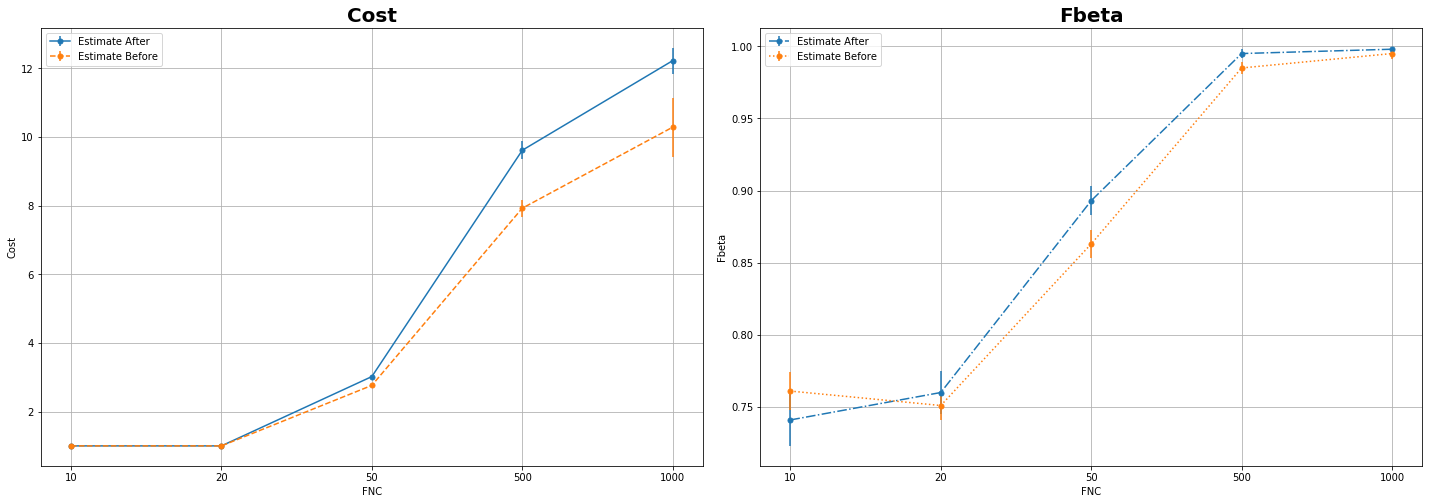

In [102]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools
from IPython.display import HTML
from IPython.core import display as ICD
from itertools import cycle

lines = ["-","--","-.",":"]

def plot_elems_lines(elems, x_values, columns, ylabel, legends):
    linecycler = cycle(lines)
    
    xticks_ind = np.arange(len(x_values))
    plt.figure(num=1, figsize=(20, 20), facecolor='w', edgecolor='k')
    plt.grid(zorder=0)
    
    for key,column in enumerate(columns):
        plt.subplot(3, 2, key+1)
        column_std = f'{column}_std'
        
        for elem in elems:
            plt.errorbar(xticks_ind, column, column_std, data=elem, linestyle=next(linecycler), marker='o', markersize=5)
        #end for

        plt.xticks(xticks_ind, wrong_costs)
        plt.xlabel(ylabel)
        plt.ylabel(column.capitalize())
        plt.grid()
        plt.title(column.capitalize(), fontweight="bold", fontsize=20)
        plt.legend(legends)
    
    plt.tight_layout()
    plt.show()
    
    

data = pd.read_csv('/Users/pmaglione/Repos/adaptive-pomdp-solutions/dai_pomdp/results/pomdp_results.csv')
elems_t = data[data.name.str.startswith('base-')][data.estimate_after == True]
elems_f = data[data.name.str.startswith('base-')][data.estimate_after == False]

elems = [elems_t, elems_f]

columns = ['cost', 'fbeta']
wrong_costs = elems[0].wrong_cost.unique()
plot_elems_lines(elems, wrong_costs, columns, "FNC", ("Estimate After", "Estimate Before"))